In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.utils import to_categorical

In [2]:
import tensorflow.keras.backend as K

In [3]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pickle
import random

In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#dirtrain='/Users/angelomathai/Downloads/Grape_Leaves_New/train'
dirtrain='/content/drive/MyDrive/Grapes Leaves Dataset (images)/train'

In [7]:
#dirtest='/Users/angelomathai/Downloads/Grape_Leaves_New/test'
dirtest='/content/drive/MyDrive/Grapes Leaves Dataset (images)/test'

In [11]:
#categories=["black_rot","esca_measles","healthy","leaf_blight","phylloxera","powder_downey"]
categories=["Black_rot","Esca_(Black_Measles)","Healthy","Leaf_blight_(Isariopsis_Leaf_Spot)"]

(256, 256, 3)


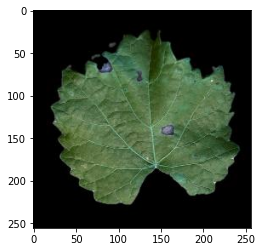

In [13]:
for c in categories:
    path=os.path.join(dirtrain,c)
    for i in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,i))
        print(img_array.shape)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [14]:
training_data = []
def create_training_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtrain,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_train=create_training_data()

In [15]:
testing_data = []
def create_testing_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtest,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                testing_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_test=create_testing_data()

In [16]:
print(len(training_data))
print(count_train)
print(len(testing_data))
print(count_test)

3209
[966, 1154, 213, 876]
880
[210, 240, 220, 210]


In [17]:
random.shuffle(training_data)
random.shuffle(testing_data)

for s in training_data:
    print(s[1])

In [18]:
x_train = []
y_train = []
x_test = []
y_test = []

In [19]:
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
'''for features,label in testing_data:
    x_train.append(features)
    y_train.append(label)'''
#print(np.array(x_train).shape)
x_train=np.array(x_train).reshape(-1,256,256,3)
#print(x_train[6])

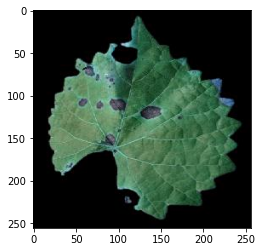

In [20]:
x=cv2.resize(training_data[0][0],(256,256))
plt.imshow(x,cmap='gray')

In [21]:
for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)
x_test=np.array(x_test).reshape(-1,256,256,3)

In [22]:
def save_training_data(x_train,y_train):
    pickle_out=open("x_train_coloured.pickle","wb")
    pickle.dump(x_train,pickle_out)
    pickle_out.close()

    pickle_out=open("y_train_coloured.pickle","wb")
    pickle.dump(y_train,pickle_out)
    pickle_out.close
save_training_data(x_train,y_train)

In [23]:
def save_testing_data(x_test,y_test):
    pickle_out=open("x_test_coloured.pickle","wb")
    pickle.dump(x_test,pickle_out)
    pickle_out.close()

    pickle_out=open("y_test_coloured.pickle","wb")
    pickle.dump(y_test,pickle_out)
    pickle_out.close()
save_testing_data(x_test,y_test)

In [24]:
def load_data():
    pickle_in=open("x_train_coloured.pickle","rb")
    x_train=pickle.load(pickle_in)
    return x_train

In [25]:
x_train.shape

(3209, 256, 256, 3)

In [26]:
K.clear_session()
model=Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))


model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))

model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(Activation('relu'))

model.add(Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(6,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                    

In [28]:
y_train_cat=to_categorical(y_train,6)

In [29]:
y_test_cat=to_categorical(y_test,6)

In [30]:
model.fit(x_train,y_train_cat,batch_size=32,epochs=25,verbose=1,validation_split=0.15,shuffle=True)

Epoch 1/25
86/86 [==============================] - 20s 90ms/step - loss: 2.7162 - accuracy: 0.4899 - val_loss: 1.0667 - val_accuracy: 0.5332
Epoch 2/25
86/86 [==============================] - 7s 82ms/step - loss: 0.7314 - accuracy: 0.6975 - val_loss: 1.1806 - val_accuracy: 0.4938
Epoch 3/25
86/86 [==============================] - 7s 83ms/step - loss: 0.4198 - accuracy: 0.8203 - val_loss: 1.3370 - val_accuracy: 0.6183
Epoch 4/25
86/86 [==============================] - 7s 84ms/step - loss: 0.3014 - accuracy: 0.8874 - val_loss: 0.6904 - val_accuracy: 0.8112
Epoch 5/25
86/86 [==============================] - 7s 83ms/step - loss: 0.2682 - accuracy: 0.9083 - val_loss: 0.3771 - val_accuracy: 0.8568
Epoch 6/25
86/86 [==============================] - 7s 86ms/step - loss: 0.1649 - accuracy: 0.9362 - val_loss: 0.0811 - val_accuracy: 0.9647
Epoch 7/25
86/86 [==============================] - 7s 85ms/step - loss: 0.1465 - accuracy: 0.9483 - val_loss: 0.2458 - val_accuracy: 0.9129
Epoch 8/25
8

import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

In [31]:
model.save("leaf_disease_coloured.h5")

In [32]:
new_model=tf.keras.models.load_model("leaf_disease_coloured.h5")

In [33]:
'''from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())'''

'from tensorflow.python.client import device_lib\nprint(device_lib.list_local_devices())'

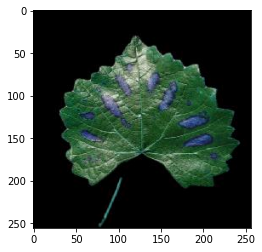

In [37]:
d='/content/drive/MyDrive/Grapes Leaves Dataset (images)/test/Esca_(Black_Measles)/0ad02171-f9d0-4d0f-bdbd-36ac7674fafc___FAM_B.Msls 4356_final_masked.jpg'
img=cv2.imread(d)
plt.imshow(img)

In [38]:
img=img.reshape(-1,256,256,3)

In [39]:
#predict_class=new_model.predict(img)
predict_class = np.argmax(new_model.predict(img), axis=-1)

In [40]:
predict_class

array([1])

In [41]:
categories[predict_class[0]]

'Esca_(Black_Measles)'